In [31]:
%matplotlib widget 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

vertices = []
half_edges = []
faces = []

In [32]:

class Vertex:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

class HalfEdge:
    def __init__(self, origin, face, next, prev, twin):
        self.origin = origin
        self.face = face
        self.twin = twin
        self.next = next
        self.prev = prev

class Face:
    def __init__(self, half_edge):
        self.half_edge = half_edge

In [33]:

def read_points_from_file():
    filename = "out.txt" 
    with open(filename, "r") as f:
        lines = f.read().splitlines()
    it = iter(lines)
    sizes = next(it).split()
    verticesSize = int(sizes[0])
    halfEdgesSize = int(sizes[1]) * 2
    FacesSize = int(sizes[2])

    # Read vertices
    for _ in range(verticesSize):
        x, y, z = map(int, next(it).split())
        vertices.append(Vertex(x, y, z))

    # Read faces
    for _ in range(FacesSize):
        half_edge_index = int(next(it))
        faces.append(Face(half_edge_index - 1))

    # Read half-edges
    for _ in range(halfEdgesSize):
        origin, twin, face, next_idx, prev = map(int, next(it).split())
        half_edges.append(HalfEdge(origin - 1, face - 1, next_idx - 1, prev - 1, twin - 1))

In [ ]:

def plot_convex_hull():
    # plot points and edges
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title('Convex Hull Visualization')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

    # Plot vertices
    xs = [v.x for v in vertices]
    ys = [v.y for v in vertices]
    zs = [v.z for v in vertices]
    ax.scatter(xs, ys, zs, color='b', label='Vertices')
    ax.legend()
    # Plot edges
    for he in half_edges:
        origin_idx = he.origin
        next_idx = half_edges[he.next].origin if he.next != -1 else None
        if next_idx is not None:
            origin = vertices[origin_idx]
            next_vertex = vertices[next_idx]
            ax.plot([origin.x, next_vertex.x], [origin.y, next_vertex.y], [origin.z, next_vertex.z], color='r')

    # Plot faces
    for face in faces:
        he_idx = face.half_edge
        vertices_on_face = []
        start_idx = he_idx
        while True:
            he = half_edges[he_idx]
            vertices_on_face.append(vertices[he.origin])
            he_idx = he.next
            if he_idx == start_idx:
                break
        # Create a polygon for the face
        poly3d = [[(v.x, v.y, v.z) for v in vertices_on_face]]
        ax.add_collection3d(Poly3DCollection(poly3d, alpha=0.1, color='g')) 

    # plt.savefig("convex_hull.png")
    plt.show()

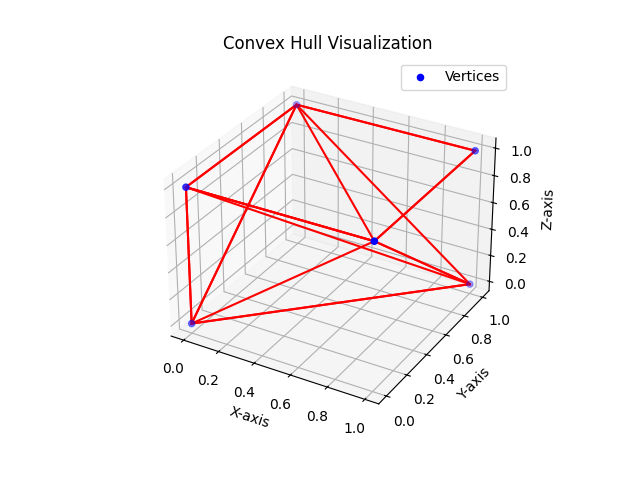

In [35]:
read_points_from_file()
plot_convex_hull()